# Practica 9 - SimPy Lavanderia de Vehículos

##### Nombre: Juan Francisco Pelaez Becerra

##### Fecha: 30/07/2022

En base al codigo anterior realizar los siguientes cambios: 

**Parametros**
* Tres tipos de vehiculos
* Tres tiempos diferentes
  * Bus: 15- 20 minutos
  * Automóvil: 7-10 minutos
  * Furgoneta: 12-15 minutos

Considere que a partir de la entrada del vehículo para ser lavado, deberán tomarse en cuenta los siguientes tiempos correspondientes al proceso de traslado desde la recepción a la máquina de lavado:

  * Bus: 4 minutos
  * Automóvil: 1 minuto
  * Furgoneta: 2 minutos


Realice una gráfica comparativa de la simulación con 3 y 4 máquinas de lavado

Generar llegada de vehiculos de 1 - 2 minutos, por 60 minutos de lavado, el tipo de vehiculo es generado aleatorialmente.

In [2]:
!pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import simpy
import random
import matplotlib.pyplot as plt

%matplotlib inline

class Vehicle():
    '''Clase para los vehículos.
    En esta se establece el tiempo mínimo de lavado, 
    el tiempo máximo de lavado y 
    el tiempo que se demora en trasladar el vahículo'''
    def __init__(self, id, kind, min_wash_time, max_wash_time, move_time):
        self.id = id
        self.kind = kind
        self.min_wash_time = min_wash_time
        self.max_wash_time = max_wash_time
        self.move_time = move_time

class Laundry(object):
    '''Clase para la lavandería.
    Aqui se almacena el Ambiente de Simulación y 
    la cantidad de máquinas disposibles'''
    def __init__(self, environment, machines_num):
        self.env = environment
        self.machines = simpy.Resource(environment, machines_num)
        
    def wash_vehicle(self, vehicle):
        ''''''
        yield self.env.timeout(vehicle.move_time);
        yield self.env.timeout(random.randint(vehicle.min_wash_time, vehicle.max_wash_time))
        print('Removido  {%d%%} suciedad vehiculo => %s ' % (random.randint(30, 90), 
                                                             vehicle.kind + ' ' + str(vehicle.id)))
        
def vehicle_arrival(env, vehicle, laundry):
    print('Llega vehiculo: %s a la hora %.2f.' % (vehicle.kind + ' ' + str(vehicle.id), env.now))
    with laundry.machines.request() as machine:
        yield machine
        print('Entra vehiculo a lavarse: %s a la hora %.2f.' % (vehicle.kind + ' ' + str(vehicle.id), env.now))
        yield env.process(laundry.wash_vehicle(vehicle))
        print('Vehiculo [%s] lavado a las %.2f.' % (vehicle.kind + ' ' + str(vehicle.id), env.now))
        k = env.now
    if k in time:
        time[k] = time[k] + 1
    else:
        time[k] = 1

def run_simulation(env, vehicles, machines_num, min_interval, max_interval):
    laundry = Laundry(env, machines_num)
    i = 0
    # Creamos llegadas de vehiculos iniciales
#     for i in range(machines_num):
#         vehicle = random.choice(vehicles)
#         env.process(vehicle_arrival(
#             env, Vehicle(i, vehicle.kind, vehicle.min_wash_time, vehicle.max_wash_time, vehicle.move_time), 
#             laundry))
    
    # Ejecutamos la simulacion
    while True:
        yield env.timeout(random.randint(min_interval, max_interval))
        vehicle = random.choice(vehicles)
        env.process(
            vehicle_arrival(
                env, 
                Vehicle(i, vehicle.kind, vehicle.min_wash_time, vehicle.max_wash_time, vehicle.move_time), 
            laundry))
        i+=1
        
def get_vehicles():
    vehicles = list()
    vehicles.append(Vehicle(0, 'Bus', 15, 20, 4))
    vehicles.append(Vehicle(0, 'Automóvil', 7, 10, 1))
    vehicles.append(Vehicle(0, 'Furgoneta', 12, 15, 2))
    return vehicles

def start_simulation(machines_num, simulation_time, min_interval = 1, max_interval = 2):
    # Reseteo de las horas
    global time
    time = {}
    
    # Creamos el entorno de simulacion
    env = simpy.Environment()
    env.process(run_simulation(
        env, get_vehicles(), machines_num, min_interval, max_interval))

    # Ejecutamos el proceso durante el tiempo de simulacion
    env.run(until = simulation_time)

    print('\nDiccionario de las horas: ', time)
    
    # Generamos una grafica en base al diccionario del tiempo
    labels = list(time.keys())
    values = list(time.values())
    plt.bar(range(len(time)), values, align="center", tick_label=labels)
    plt.title(f'Tiempo/Salida Vehiculos con {machines_num} máquinas')
    plt.xlabel('Tiempo')
    plt.ylabel('Nro. Vehiculos')
    plt.show()

In [4]:
# Variables y constantes globales

# Creamos un diccionario para almacenar las horas en que se lavan los vehiculos
# Esto permite graficar o generar los resultados
time = {}

# Tiempo de simulación
SIMULATION_TIME = 60

# Semilla
SEED = 77

Lavanderia de Vehiculos - 3 máquinas 

Llega vehiculo: Automóvil 0 a la hora 2.00.
Entra vehiculo a lavarse: Automóvil 0 a la hora 2.00.
Llega vehiculo: Bus 1 a la hora 3.00.
Entra vehiculo a lavarse: Bus 1 a la hora 3.00.
Llega vehiculo: Automóvil 2 a la hora 4.00.
Entra vehiculo a lavarse: Automóvil 2 a la hora 4.00.
Llega vehiculo: Bus 3 a la hora 6.00.
Llega vehiculo: Bus 4 a la hora 7.00.
Llega vehiculo: Bus 5 a la hora 9.00.
Removido  {62%} suciedad vehiculo => Automóvil 0 
Llega vehiculo: Automóvil 6 a la hora 10.00.
Vehiculo [Automóvil 0] lavado a las 10.00.
Entra vehiculo a lavarse: Bus 3 a la hora 10.00.
Llega vehiculo: Automóvil 7 a la hora 11.00.
Removido  {37%} suciedad vehiculo => Automóvil 2 
Llega vehiculo: Bus 8 a la hora 13.00.
Vehiculo [Automóvil 2] lavado a las 13.00.
Entra vehiculo a lavarse: Bus 4 a la hora 13.00.
Llega vehiculo: Automóvil 9 a la hora 15.00.
Llega vehiculo: Bus 10 a la hora 16.00.
Llega vehiculo: Bus 11 a la hora 17.00.
Llega vehiculo: Furgoneta 1

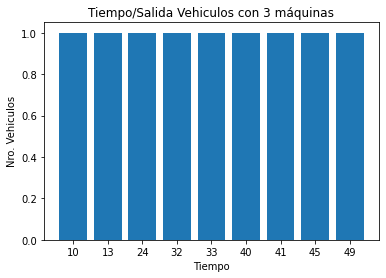

In [5]:
random.seed(SEED)
machines_num = 3
print(f'Lavanderia de Vehiculos - {machines_num} máquinas', '\n')
start_simulation(machines_num, SIMULATION_TIME)

Lavanderia de Vehiculos - 4 máquinas 

Llega vehiculo: Automóvil 0 a la hora 2.00.
Entra vehiculo a lavarse: Automóvil 0 a la hora 2.00.
Llega vehiculo: Bus 1 a la hora 3.00.
Entra vehiculo a lavarse: Bus 1 a la hora 3.00.
Llega vehiculo: Automóvil 2 a la hora 4.00.
Entra vehiculo a lavarse: Automóvil 2 a la hora 4.00.
Llega vehiculo: Bus 3 a la hora 6.00.
Entra vehiculo a lavarse: Bus 3 a la hora 6.00.
Llega vehiculo: Bus 4 a la hora 7.00.
Llega vehiculo: Bus 5 a la hora 9.00.
Removido  {62%} suciedad vehiculo => Automóvil 0 
Llega vehiculo: Bus 6 a la hora 10.00.
Vehiculo [Automóvil 0] lavado a las 10.00.
Entra vehiculo a lavarse: Bus 4 a la hora 10.00.
Llega vehiculo: Automóvil 7 a la hora 12.00.
Removido  {35%} suciedad vehiculo => Automóvil 2 
Llega vehiculo: Furgoneta 8 a la hora 13.00.
Vehiculo [Automóvil 2] lavado a las 13.00.
Entra vehiculo a lavarse: Bus 5 a la hora 13.00.
Llega vehiculo: Automóvil 9 a la hora 15.00.
Llega vehiculo: Bus 10 a la hora 16.00.
Llega vehiculo: Bus

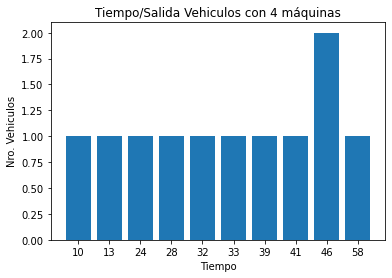

In [6]:
random.seed(SEED)
machines_num = 4
print(f'Lavanderia de Vehiculos - {machines_num} máquinas', '\n')
start_simulation(machines_num, SIMULATION_TIME)